In [1]:
# Lab6 - Zmiana wartości pikseli – Metody na obrazie

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

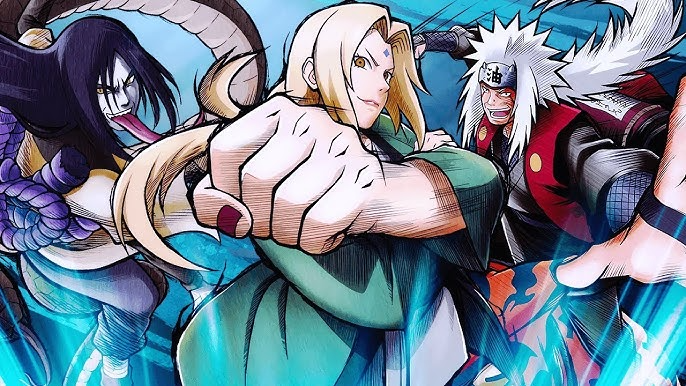

In [4]:
# Zadanie 1
obraz = Image.open("im.png")
inicjaly = Image.open("inicjaly_wlasne.bmp")

obraz1 = obraz.copy()
obraz

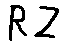

In [5]:
inicjaly

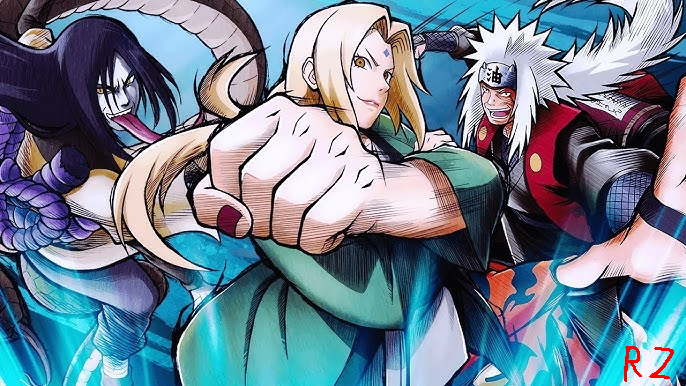

In [6]:
# Zadanie 2

# a) Napisz funkcję wstaw_inicjaly(obraz, inicjaly, m, n, kolor), gdzie m,
# n są współrzędnymi punktu, w którym wstawimy w obraz, inicjaly
# w kolorze równym wartości kolor.


def wstaw_inicjaly(obraz, obraz_wstawiany, m, n, kolor):
    obraz_copy = obraz.copy()
    obraz_wstawiany_copy = obraz_wstawiany.copy()

    w0, h0 = obraz_copy.size
    w1, h1 = obraz_wstawiany.size

    n_k = min(h0, h1+n)
    m_k = min(w0, w1+m)
    n_p = max(0, n)
    m_p = max(0, m)

    for i in range(n_p, n_k):
        for j in range(m_p, m_k):
            if(obraz_wstawiany_copy.getpixel((j - m, i - n)) == 0): # [i - n, j - m]
                obraz_copy.putpixel((j, i), kolor)
            # else:
                # nie zrosumiałem czy muszą zostać się białe pikseli
                # obraz_copy.putpixel((j, i), (255, 255, 255))

    return obraz_copy

w_ob, h_ob = obraz1.size
w_in, h_in = inicjaly.size
wstaw_inicjaly(obraz1, inicjaly, w_ob - w_in, h_ob - h_in, (255, 0, 0)).save("obraz1.png", "PNG")

wstaw_inicjaly(obraz1, inicjaly, w_ob - w_in, h_ob - h_in, (255, 0, 0))

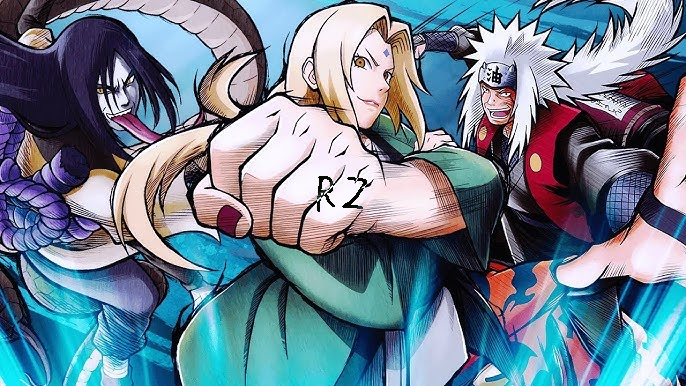

In [7]:
# b) Analogicznie do funkcji rozjasnij_obraz_z_maska, napisz funkcję
# wstaw_inicjaly_maska(obraz, inicjaly, m, n), gdzie m, n są
# współrzędnymi punktu, w którym traktując inicjały jako maskę
# zmienimy piksele odpowiadające czarnym pikselom z maski na ich
# negatywy.

def zakres(w, h):  # funkcja, która uprości podwójna petle for
    return [(i, j) for i in range(w) for j in range(h)]

def wstaw_inicjaly_maska(obraz, inicjaly, m, n):  # w miejscu m, n zmienia tylko te pixele, które odpowiadają czarnym pixelom maski, maska jest obrazem czarnobiałym
    obraz1 = obraz.copy()
    w, h = obraz.size
    w0, h0 = inicjaly.size
    for i, j in zakres(w0, h0):
        if i + m < w and j + n < h:
            if inicjaly.getpixel((i, j)) == 0:
                p = obraz.getpixel((i + m, j + n))
                obraz1.putpixel((i + m, j + n), (255 - p[0], 255 - p[1], 255 - p[2]))
    return obraz1

wstaw_inicjaly_maska(obraz1, inicjaly, (w_ob // 2 - w_in // 2), (h_ob // 2 - h_in // 2)).save("obraz2.png", "PNG")
wstaw_inicjaly_maska(obraz1, inicjaly, (w_ob // 2 - w_in // 2), (h_ob // 2 - h_in // 2))

<module 'matplotlib.pyplot' from '/home/darius/myenv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

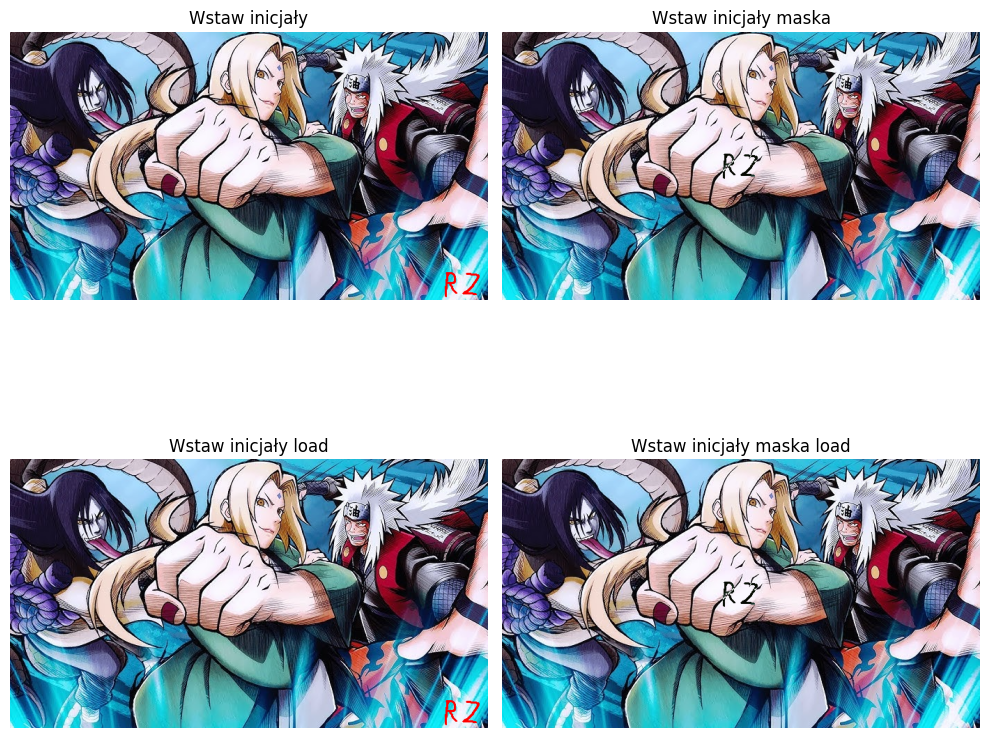

In [8]:
# Zadanie 3 
# 3. Stosując metodę load napisz funkcje wstaw_inicjaly_load(obraz, inicjaly, m, n, kolor) oraz
# wstaw_inicjaly_maska(obraz, inicjaly, m, n, x, y, z) działające identycznie jak funkcje z pkt. 2.a, 2.b. Przetestuj je z tymi samymi ustawieniami co w
# zadaniu 2. Wyniki testu przedstaw na diagramie plt ((pod nazwąfig1.png).

def wstaw_inicjaly_load(obraz, obraz_wstawiany, m, n, kolor):
    obraz_copy = obraz.copy()
    obraz_wstawiany_copy = obraz_wstawiany.copy()

    pix_bazowy = obraz_copy.load()
    pix_wstawiany = obraz_wstawiany_copy.load()

    w0, h0 = obraz_copy.size
    w1, h1 = obraz_wstawiany.size

    n_k = min(h0, h1 + n)
    m_k = min(w0, w1 + m)
    n_p = max(0, n)
    m_p = max(0, m)


    for i in range(n_p, n_k):
        for j in range(m_p, m_k):
            in_y = i - n
            in_x = j - m

            # Jeśli piksel inicjałów jest czarny (0), ustawiamy kolor inicjałów
            if pix_wstawiany[in_x, in_y] == 0:
                pix_bazowy[j, i] = kolor
            # else:  # Jeśli nie, ustawiamy biały piksel
                # pix_bazowy[j, i] = (255, 255, 255)

    return obraz_copy


w_ob, h_ob = obraz1.size
w_in, h_in = inicjaly.size
wstaw_inicjaly_load(obraz1, inicjaly, w_ob - w_in, h_ob - h_in, (255, 0, 0)).save("obraz3.png", "PNG")

def wstaw_inicjaly_maska_load(obraz, inicjaly, m, n):
    obraz1 = obraz.copy()
    inicjaly1 = inicjaly.copy()
    pix_baz = obraz1.load()
    pix_ini = inicjaly1.load()
    w, h = obraz.size
    w0, h0 = inicjaly.size
    for i, j in zakres(w0, h0):
        if i + m < w and j + n < h:
            if pix_ini[i, j] == 0:
                p = pix_baz[i + m, j + n]
                pix_baz[i + m, j + n] = ((255 - p[0]), (255 - p[1]), (255 - p[2])) #(x, y, z)
    return obraz1


wstaw_inicjaly_maska_load(obraz1, inicjaly, (w_ob // 2 - w_in // 2), (h_ob // 2 - h_in // 2)).save("obraz4.png", "PNG")


obraz1 = Image.open("obraz1.png")
obraz2 = Image.open("obraz2.png")
obraz3 = Image.open("obraz3.png")
obraz4 = Image.open("obraz4.png")

# Tworzenie figury i osi
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Ustawianie tytułów i wyświetlanie obrazów
axes[0, 0].imshow(obraz1)
axes[0, 0].set_title("Wstaw inicjały")
axes[0, 0].axis("off")

axes[0, 1].imshow(obraz2)
axes[0, 1].set_title("Wstaw inicjały maska")
axes[0, 1].axis("off")

axes[1, 0].imshow(obraz3)
axes[1, 0].set_title("Wstaw inicjały load")
axes[1, 0].axis("off")

axes[1, 1].imshow(obraz4)
axes[1, 1].set_title("Wstaw inicjały maska load")
axes[1, 1].axis("off")

plt.tight_layout()
plt.savefig("fig1.png")
# plt.show()
plt

<module 'matplotlib.pyplot' from '/home/darius/myenv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

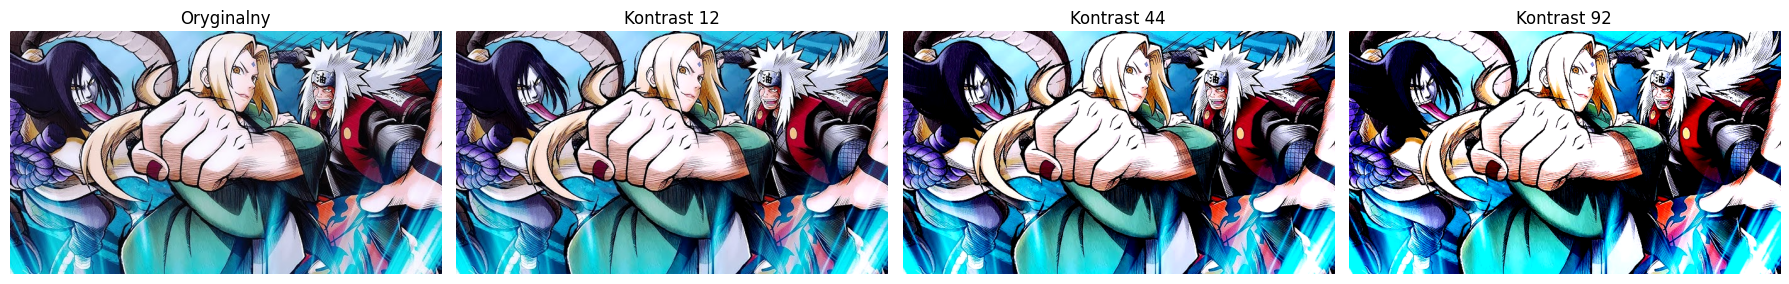

In [9]:
# Zadanie 4
# Stosując metodę point i funkcję lambda:

# a) Napisz funkcję kontrast(obraz, wsp_kontrastu), która działa tak,
# że każdy piksel i zmienia wartość zgodnie z funkcją kontrastu f(i) = 128 + (i -128) * mn, gdzie
# mn = (( 255 + wsp_kontrastu) /255) **2, a wsp_kontrastu przyjmuje wartości o 0 do 100

def kontrast(obraz, wsp_kontrastu):
    wsp_kontrastu = wsp_kontrastu % 100
    mn = ((255 + wsp_kontrastu) / 255) ** 2
    return obraz.point(lambda i: int(128 + (i - 128) * mn))

obraz_oryginalny = obraz.copy()
obraz_kontrast1 = kontrast(obraz_oryginalny, 12)
obraz_kontrast2 = kontrast(obraz_oryginalny, 44)
obraz_kontrast3 = kontrast(obraz_oryginalny, 92)


fig, axes = plt.subplots(1, 4, figsize=(18, 7))

axes[0].imshow(obraz_oryginalny)
axes[0].set_title("Oryginalny")
axes[0].axis("off")

axes[1].imshow(obraz_kontrast1)
axes[1].set_title("Kontrast 12")
axes[1].axis("off")

axes[2].imshow(obraz_kontrast2)
axes[2].set_title("Kontrast 44")
axes[2].axis("off")

axes[3].imshow(obraz_kontrast3)
axes[3].set_title("Kontrast 92")
axes[3].axis("off")

plt.tight_layout()
plt.savefig("fig2.png")
#plt.show()
plt

Funkcja kontrast modyfikuje obraz, wzmacniając różnice między jasnymi a
ciemnymi pikselami. Jej działanie zależy od wartości parametru wsp_kontrastu.
Oto szczegółowa analiza efektów uzyskanych dla różnych wartości współczynnika:

Wzrost wartości wsp_kontrastu prowadzi do zwiększenia różnic tonalnych w obrazie.

Niskie wartości kontrastu (np. 12) subtelnie poprawiają jakość obrazu, zachowując jego naturalność.

Średnie wartości kontrastu (np. 44) podkreślają szczegóły, zwiększając wyrazistość obrazu.

Wysokie wartości kontrastu (np. 92) dramatycznie zmieniają obraz, ale mogą powodować utratę detali w średnich tonach.


<module 'matplotlib.pyplot' from '/home/darius/myenv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

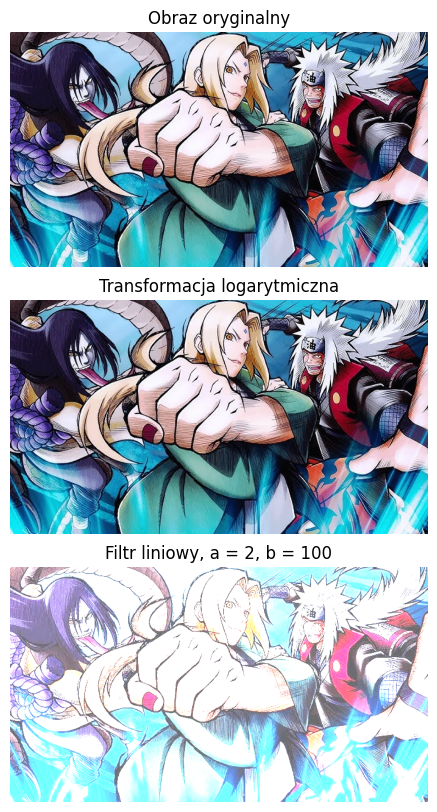

In [14]:
# b) Napisz funkcję transformacja_logarytmiczna(obraz), która działa tak, że każdy piksel i zmienia wartość zgodnie z funkcją
# f(i) = 255 * np.log(1 + i / 255) Obraz oryginalny, obraz uzyskany po zastosowaniu tej funkcji i obraz po zastosowaniu funkcji filtru liniowego dla a=2 i b =100umieść na diagramie plt (pod nazwą fig3.png). Napisz w raporcie czym różnią się te 3 obrazy.

def filtr_liniowy(image, a, b): # a, b liczby całkowite
    w, h = image.size
    pixele = image.load()
    for i, j in zakres(w, h):
        pixele[i, j] = (pixele[i, j][0]* a + b, pixele[i, j][1]* a + b, pixele[i, j][2]* a + b)

def transformacja_logarytmiczna(obraz):
    return obraz.point(lambda i: 255 * (np.log(1 + i / 255)))

obraz_oryginalny = obraz.copy()
obraz_transf = transformacja_logarytmiczna(obraz.copy())
obraz_filtr_liniowy = obraz.copy()
filtr_liniowy(obraz_filtr_liniowy, 2, 100)

plt.figure(figsize=(7, 10))
plt.subplot(3, 1, 1)
plt.imshow(obraz_oryginalny)
plt.title("Obraz oryginalny")
plt.axis('off')
plt.subplot(3, 1, 2)
plt.imshow(obraz_oryginalny)
plt.title("Transformacja logarytmiczna")
plt.axis('off')
plt.subplot(3, 1, 3)
plt.imshow(obraz_filtr_liniowy)
plt.title("Filtr liniowy, a = 2, b = 100")
plt.axis('off')
plt.subplots_adjust(wspace=0.05, hspace=0.14)
plt.savefig('fig3.png')

plt

Oryginalny obraz:

Zawiera oryginalne piksele bez modyfikacji.
Rozkład jasności i kolorów jest naturalny, zgodny z danymi źródłowymi.

Transformacja logarytmiczna:

Zwiększa widoczność szczegółów w ciemniejszych partiach obrazu.
Działa lepiej przy dużej dynamice obrazu (np. obrazy o dużym kontraście między ciemnymi a jasnymi obszarami).
Kolory w jaśniejszych obszarach są mniej wyraźne, gdyż logarytm spłaszcza jasne wartości.

Filtr liniowy (a=2, b=100):

Jasność obrazu została znacznie zwiększona przez dodanie stałej b = 100.
Kontrast został podwojony przez wartość a = 2.
Obraz ma tendencję do "przepalania" pikseli, szczególnie tam, gdzie wartości są bliskie 255. Wynikiem są jasne, nienaturalnie wyglądające obszary.


<module 'matplotlib.pyplot' from '/home/darius/myenv/lib/python3.12/site-packages/matplotlib/pyplot.py'>

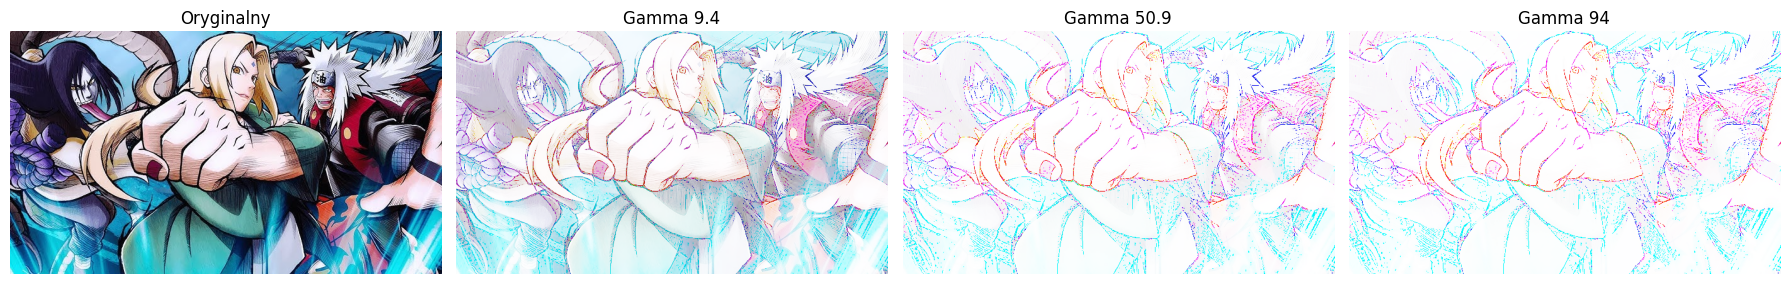

In [15]:
# c)
def transformacja_gamma(obraz, gamma):
    if(gamma <= 0.0):
        gamma = 0.001
    elif(gamma > 100.0):
        gamma = 100.0

    return obraz.point(lambda i: ((i/255) ** (1/gamma)) * 255)

obraz_oryginalny = obraz.copy()
obraz_gamma1 = transformacja_gamma(obraz_oryginalny, 9.4)
obraz_gamma2 = transformacja_gamma(obraz_oryginalny, 50.9)
obraz_gamma3 = transformacja_gamma(obraz_oryginalny, 94)


fig, axes = plt.subplots(1, 4, figsize=(18, 7))


axes[0].imshow(obraz_oryginalny)
axes[0].set_title("Oryginalny")
axes[0].axis("off")

axes[1].imshow(obraz_gamma1)
axes[1].set_title("Gamma 9.4")
axes[1].axis("off")

axes[2].imshow(obraz_gamma2)
axes[2].set_title("Gamma 50.9")
axes[2].axis("off")

axes[3].imshow(obraz_gamma3)
axes[3].set_title("Gamma 94")
axes[3].axis("off")


plt.tight_layout()
plt.savefig("fig4.png")
#plt.show()

plt


Transformacja gamma działa nieliniowo, co pozwala modyfikować sposób, w jaki jasność jest rozkładana w obrazie:

Niskie wartości gamma (<1) podkreślają ciemniejsze partie obrazu.

Średnie wartości gamma (1-40) utrzymują równowagę między ciemnymi a jasnymi partiami, co poprawia ogólną widoczność szczegółów, ale już nie tak widocznie.

Wysokie wartości gamma (>40) powodują dominację jasnych partii obrazu, co może prowadzić do utraty szczegółów w jasnych obszarach.

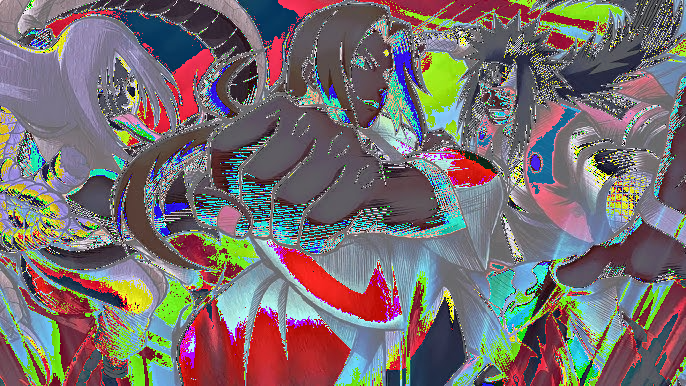

In [16]:
# Zadanie 5

# a)
T = np.array(obraz, dtype='uint8')
T += 100
#print(T)
#print("------------------------------------------------------------")
obraz_wynik = Image.fromarray(T, "RGB")
#print(np.asarray(obraz.point(lambda i: i + 100)))

obraz_wynik

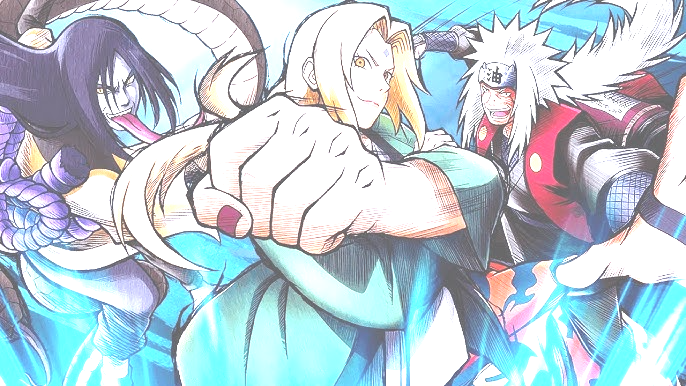

In [17]:
obraz.point(lambda i: i + 100)

ponieważ te dwie metody przetwarzają piksele obrazu w różny sposób.

z użyciem np.array i +=
W tej metodzie obraz jest najpierw konwertowany na tablicę NumPy.
Następnie, przy użyciu +=, dodawana jest wartość 100 do każdego piksela w tablicy
Może wystąpić przekroczenie zakresu (np. jeśli wartość pikseli przekroczy 255, wtedy
nastąpi "wrap-around", pixel % 256).

z użyciem obraz.point() i lambda
Funkcja obraz.point(lambda i: i + 100) działa na każdym pikselu indywidualnie,
ale w tym przypadku jest używana na każdym kanale obrazu osobno.
Wartości pikseli, które przekraczają 255, mogą zostać obcięte do 255 (klipping),
co może skutkować utratą informacji o szczegółach obrazu.

czyli przy pracy na tablice, wartość piksela jest pixel % 256, a przy pracy
na samym obrazie za pomocą point(), wartość piksela jest obcięta do 255, z tego powodu obrazy mają różny wygląd

386 686


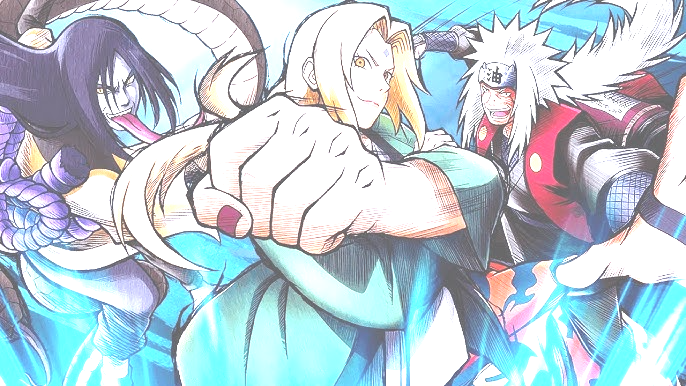

In [10]:
# b)

def działaj_na_tablicy(obraz):
    T = np.array(obraz, dtype='uint8')
    w, h, kolor = T.shape
    print(w, h)

    for i in range(w):
        for j in range(h):
            if(T[i, j][0] > 255 - 100 or T[i, j][1] > 255 - 100 or T[i, j][2] > 255 - 100):
                T[i, j][0] = min(T[i, j][0], 255 - 100)
                T[i, j][1] = min(T[i, j][1], 255 - 100)
                T[i, j][2] = min(T[i, j][2], 255 - 100)

            T[i, j] += 100

    return Image.fromarray(T)



działaj_na_tablicy(obraz)